In [1]:
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
import os

In [2]:
data_dir = '/opt/ml/yolo_data'
sub_data_dir = ['test', 'train', 'val']

In [3]:
labels = {0:'Single Helmet',1:'Single No Helmet',2:'Shared Helmet',3:'Shared No Helmet',}
label_colors = {0:'black',1:'darkcyan',2:'sienna',3:'gray',}

뽑아낼 data: bbox coordinate, bbox area, bbox center, img size, bbox area/ img size, box num, class,

In [4]:
annotation=[]
for sub_path in sub_data_dir:
    ann_dir_path = os.path.join(data_dir, sub_path, "temp")
    for (dirpath, dirnames, filenames) in os.walk(ann_dir_path):
        for filename in filenames:
            f = open(os.path.join(dirpath, filename))
            data = json.load(f)
            img_height = data['size']['height']
            img_width = data['size']['width']
            img_area = img_height*img_width
            box_num = len(data['objects'])
            bbox_coordinate = dict()
            bbox_area = dict()
            bbox_center = dict()
            bbox_class = dict()
            bbox_tags = dict()
            bbox_width = dict()
            bbox_height = dict()
            for idx, obj in enumerate(data['objects']):
                tags = {
                    "orientation": None,
                    "helmet": None,
                    "alone": None,
                    "etc": None
                }
                for tag in obj['tags']:
                    tags[tag['name']] = tag['value']
                bbox_tags[idx] = tags
                x_min = obj['points']['exterior'][0][0] / img_width
                y_min = obj['points']['exterior'][0][1] / img_height
                x_max = obj['points']['exterior'][1][0] / img_width
                y_max = obj['points']['exterior'][1][1] / img_height
                bbox_width[idx] = x_max-x_min
                bbox_height[idx] = y_max-y_min
                bbox_coordinate[idx] = x_min,y_min,x_max,y_max
                bbox_area[idx] = bbox_width[idx]*bbox_height[idx]
                bbox_center[idx] = (x_min+x_max)/2,(y_min+y_max)/2
                bbox_class[idx] = int(obj['classTitle'])
            annotation.append([
                os.path.join(dirpath, filename),
                img_height,
                img_width,
                img_area,
                box_num,
                bbox_coordinate,
                bbox_area,
                bbox_center,
                bbox_class,
                bbox_tags,
                bbox_height,
                bbox_width])
                
            

In [5]:
df = pd.DataFrame(annotation, columns = ['Image dir','Image Height', 'Image Width', 'Image Area', 'Box Num', 'Box Coordinate', 'Box Area', 'Box Center', 'Box Class', 'Box Tag', 'Box Height', 'Box Width'])

In [8]:
df.head()

,Image dir,Image Height,Image Width,Image Area,Box Num,Box Coordinate,Box Area,Box Center,Box Class,Box Tag,Box Height,Box Width
0,/opt/ml/yolo_data/test/temp/yt_2_0155.json,760,1299,987240,3,"{0: (0.6481909160892995, 0.12763157894736843, ...","{0: 0.16836939346055668, 1: 0.0496434504274543...","{0: (0.7455735180908392, 0.5598684210526316), ...","{0: 1, 1: 1, 2: 1}","{0: {'orientation': 'Side', 'helmet': 'False',...","{0: 0.8644736842105263, 1: 0.49605263157894736...","{0: 0.19476520400307928, 1: 0.1000769822940723..."
1,/opt/ml/yolo_data/test/temp/self_0154.json,4000,6000,24000000,2,"{0: (0.5221666666666667, 0.2285, 0.56966666666...","{0: 0.010402499999999997, 1: 0.010437499999999...","{0: (0.5459166666666666, 0.338), 1: (0.5831666...","{0: 1, 1: 1}","{0: {'orientation': 'Front', 'helmet': 'False'...","{0: 0.219, 1: 0.1875}","{0: 0.04749999999999999, 1: 0.05566666666666664}"
2,/opt/ml/yolo_data/test/temp/self_0085.json,855,1280,1094400,1,"{0: (0.43359375, 0.2, 0.55859375, 0.8409356725...",{0: 0.08011695906432748},"{0: (0.49609375, 0.52046783625731)}",{0: 0},"{0: {'orientation': 'Rear', 'helmet': 'True', ...",{0: 0.6409356725146198},{0: 0.125}
3,/opt/ml/yolo_data/test/temp/self_0187.json,4000,6000,24000000,1,"{0: (0.3905, 0.15975, 0.5726666666666667, 0.63...",{0: 0.08611929166666665},"{0: (0.48158333333333336, 0.39612499999999995)}",{0: 3},"{0: {'orientation': 'Side', 'helmet': 'False',...",{0: 0.47274999999999995},{0: 0.18216666666666664}
4,/opt/ml/yolo_data/test/temp/yt_1_0175.json,977,1814,1772278,1,"{0: (0.6510474090407938, 0.4032753326509724, 0...",{0: 0.01907714252504403},"{0: (0.6799889746416758, 0.5680655066530195)}",{0: 0},"{0: {'orientation': 'Front', 'helmet': 'True',...",{0: 0.3295803480040942},{0: 0.057883131201764026}


<AxesSubplot:ylabel='Image Area'>

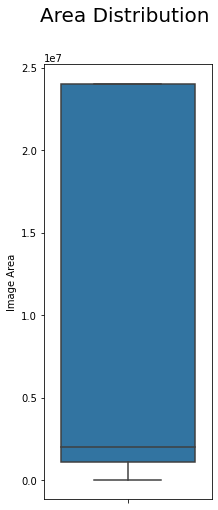

In [9]:
f, ax = plt.subplots(1,1, figsize = (3,8))
plt.suptitle("Area Distribution", fontsize = 20)
sns.boxplot(y='Image Area', data=df, ax=ax)

<AxesSubplot:ylabel='Box Num'>

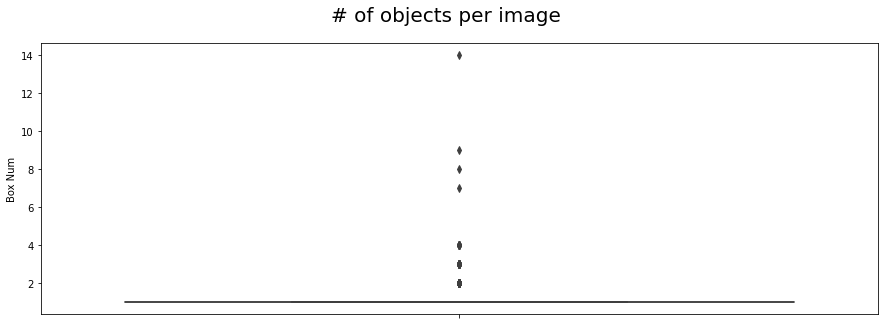

In [10]:
f, ax = plt.subplots(1,1, figsize = (15,5))
plt.suptitle("# of objects per image", fontsize = 20)
sns.boxplot(y='Box Num', data=df, ax=ax)


In [12]:
from collections import Counter
cat_num = Counter()
for index, row in df.iterrows():
    for label in row['Box Class'].values():
        cat_num.update(str(label))


In [13]:
df_cat_num = pd.DataFrame.from_dict(cat_num, orient='index', columns=['Number of box']).sort_index()

<AxesSubplot:ylabel='Number of box'>

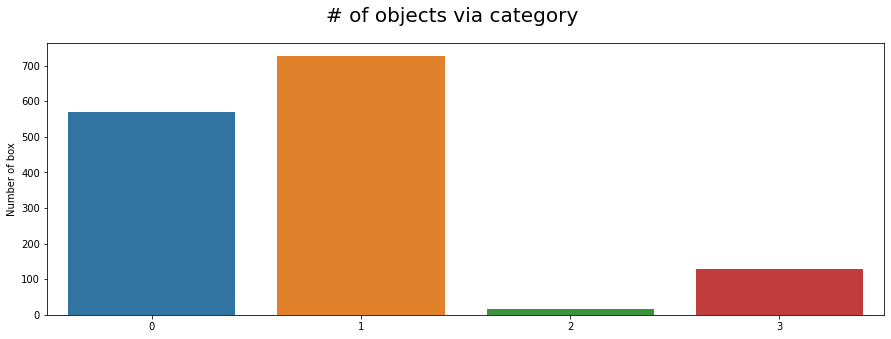

In [14]:
f, ax = plt.subplots(1,1, figsize = (15,5))
plt.suptitle("# of objects via category", fontsize = 20)
sns.barplot(x=df_cat_num.index, y='Number of box', data=df_cat_num, ax=ax)

In [12]:
df.columns

Index(['Image dir', 'Image Height', 'Image Width', 'Image Area', 'Box Num',
       'Box Coordinate', 'Box Area', 'Box Center', 'Box Class', 'Box Tag',
       'Box Height', 'Box Width'],
      dtype='object')

In [13]:
box_properties=[]
for index, row in df.iterrows():
    for i in range(row['Box Num']):
        box_properties.append([
            row['Box Class'][i],
            row['Box Coordinate'][i],
            row['Box Height'][i],
            row['Box Width'][i],
            row['Box Center'][i],
            row['Box Area'][i],
            row['Box Tag'][i]['orientation'],
            row['Box Tag'][i]['helmet'],
            row['Box Tag'][i]['alone'],
            row['Box Tag'][i]['etc'],
        ])

In [14]:
df_box = pd.DataFrame(
    box_properties,
    columns=[
        'Label',
        'Coordinate',
        'Height',
        'Width',
        'Center',
        'Area',
        'Orientation',
        'Helmet',
        'Alone',
        'Etc.',
    ]
)

In [15]:
df_box = df_box.assign(Ratio=lambda x: x['Height']/x['Width'], )

In [16]:
df_box['Label'] = df_box['Label'].apply(lambda x: labels[x])
df_box

,Label,Coordinate,Height,Width,Center,Area,Orientation,Helmet,Alone,Etc.,Ratio
0,Single No Helmet,"(0.36171875, 0.06432748538011696, 0.55546875, ...",0.891228,0.193750,"(0.45859374999999997, 0.5099415204678363)",0.172675,Front,False,True,None,4.599887
1,Single No Helmet,"(0.4828125, 0.4023391812865497, 0.5453125, 0.6...",0.259649,0.062500,"(0.5140625, 0.5321637426900585)",0.016228,Rear,False,True,None,4.154386
2,Single No Helmet,"(0.43515625, 0.38362573099415204, 0.4671875, 0...",0.154386,0.032031,"(0.451171875, 0.46081871345029235)",0.004945,Front,False,True,None,4.819855
3,Single No Helmet,"(0.1921875, 0.23157894736842105, 0.3, 0.707602...",0.476023,0.107812,"(0.24609375, 0.4695906432748538)",0.051321,Side,False,True,None,4.415289
4,Single No Helmet,"(0.30625, 0.03391812865497076, 0.56171875, 0.9...",0.963743,0.255469,"(0.43398437500000003, 0.5157894736842105)",0.246206,Side,False,True,None,3.772448
...,...,...,...,...,...,...,...,...,...,...,...
1436,Single Helmet,"(0.5149721448467967, 0.5574282147315855, 0.551...",0.174157,0.036212,"(0.5330779944289694, 0.6445068664169789)",0.006307,Front,True,True,None,4.809421
1437,Single No Helmet,"(0.6481909160892995, 0.12763157894736843, 0.84...",0.864474,0.194765,"(0.7455735180908392, 0.5598684210526316)",0.168369,Side,False,True,blur,4.438543
1438,Single No Helmet,"(0.4926866820631255, 0.18026315789473685, 0.59...",0.496053,0.100077,"(0.5427251732101617, 0.42828947368421055)",0.049643,Side,False,True,None,4.956711
1439,Single No Helmet,"(0.4257120862201694, 0.2565789473684211, 0.467...",0.273684,0.041570,"(0.44649730561970746, 0.393421052631579)",0.011377,Rear,False,True,None,6.583626


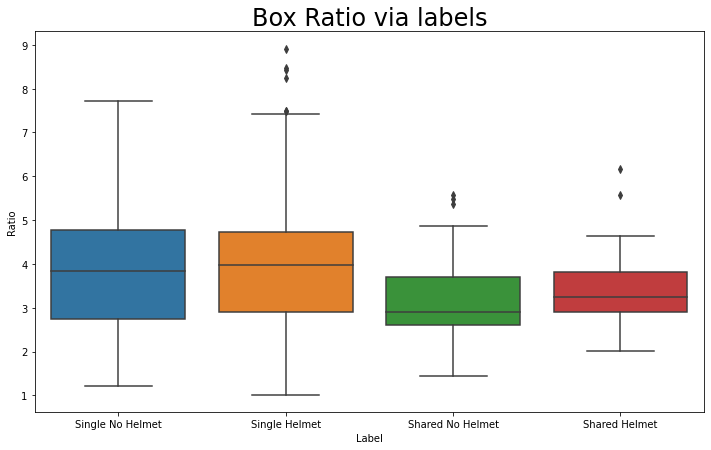

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.boxplot(x='Label', y='Ratio', data=df_box, ax=ax,
              )
ax.set_title('Box Ratio via labels', fontsize=24)
plt.show()

In [18]:
center_x = df_box['Center'].apply(lambda x: x[0])
center_y = df_box['Center'].apply(lambda x: x[1])

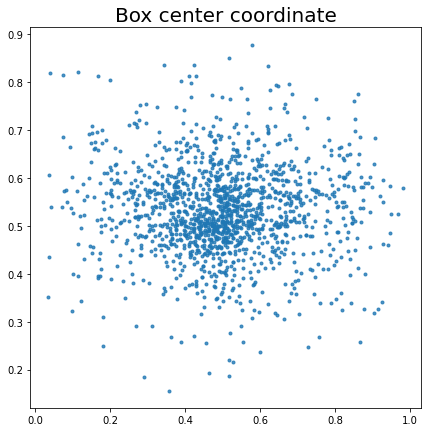

In [19]:
fig, ax = plt.subplots(1,1, figsize=(7, 7))
plt.scatter(center_x, center_y,
    alpha=0.8,
    marker='.'
    )
ax.set_title('Box center coordinate', fontsize=20)
plt.show()

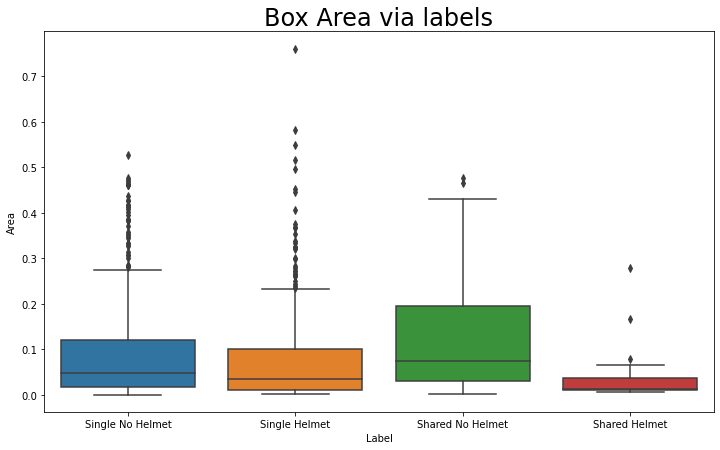

In [31]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.boxplot(x='Label', y='Area', data=df_box, ax=ax,
              )
ax.set_title('Box Area via labels', fontsize=24)
plt.show()

In [21]:
df_tags = df_box[['Orientation', "Alone", "Helmet", "Label"]]

In [22]:
df_orientation = df_tags['Orientation']
df_orientation = df_orientation.value_counts().to_frame()
df_alone = df_tags['Alone']
df_alone = df_alone.value_counts().to_frame().sort_index()
df_helmet = df_tags['Helmet']
df_helmet = df_helmet.value_counts().to_frame().sort_index()

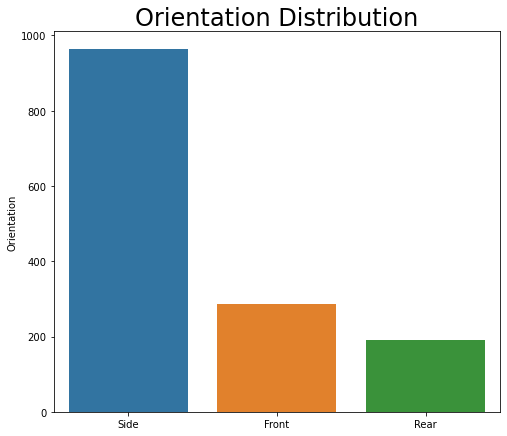

In [23]:
fig, ax = plt.subplots(1,1, figsize=(8, 7))
sns.barplot(x=df_orientation.index,y='Orientation', data=df_orientation, ax=ax,
              )
ax.set_title('Orientation Distribution', fontsize=24)
plt.show()

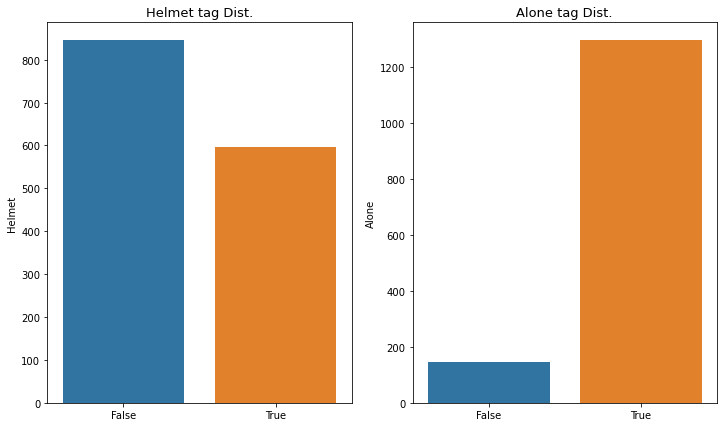

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12, 7))
sns.barplot(x=['False','True'],y='Helmet', data=df_helmet, ax=ax[0],
              )
ax[0].set_title('Helmet tag Dist.', fontsize=13)
sns.barplot(x=['False','True'],y='Alone', data=df_alone, ax=ax[1],
              )
ax[1].set_title('Alone tag Dist.', fontsize=13)
plt.show()

In [25]:
df_tags = df_box[['Orientation', "Alone", "Helmet", "Label"]]

In [26]:
df_ori = df_tags.groupby(["Orientation", "Label"]).size().to_frame()
df_ori.reset_index(inplace=True)
df_ori = df_ori.rename(columns={0:'Total_Numbers'})

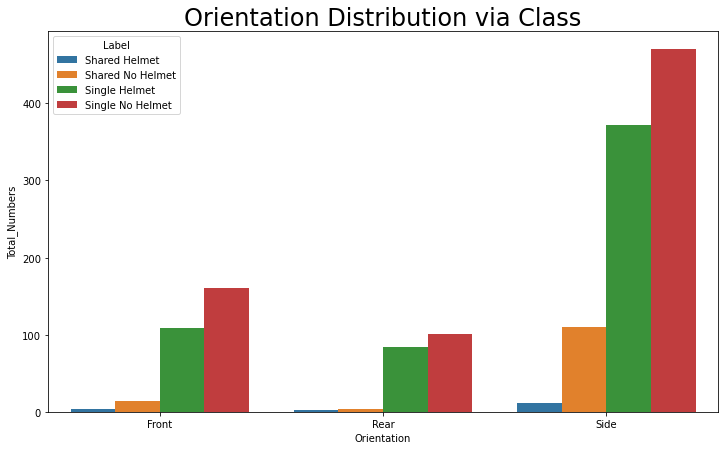

In [33]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.barplot(x='Orientation', y='Total_Numbers', data=df_ori, hue='Label')
ax.set_title('Orientation Distribution via Class', fontsize=24)
plt.show()

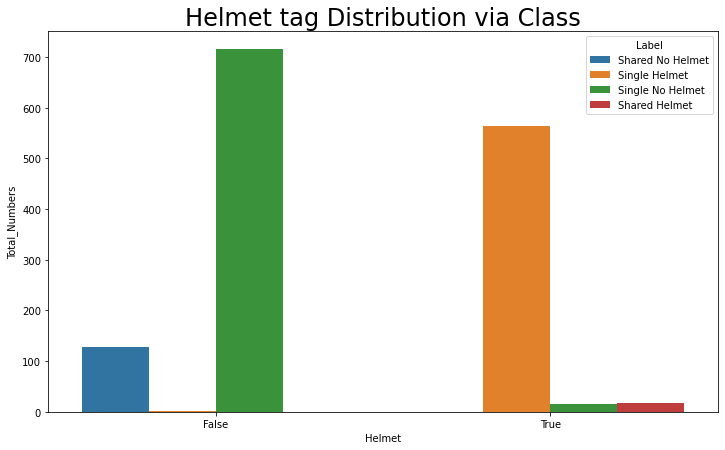

In [34]:
df_hel = df_tags.groupby(["Helmet", "Label"]).size().to_frame()
df_hel.reset_index(inplace=True)
df_hel = df_hel.rename(columns={0:'Total_Numbers'})

fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.barplot(x='Helmet', y='Total_Numbers', data=df_hel, hue='Label')
ax.set_title('Helmet tag Distribution via Class', fontsize=24)
plt.show()

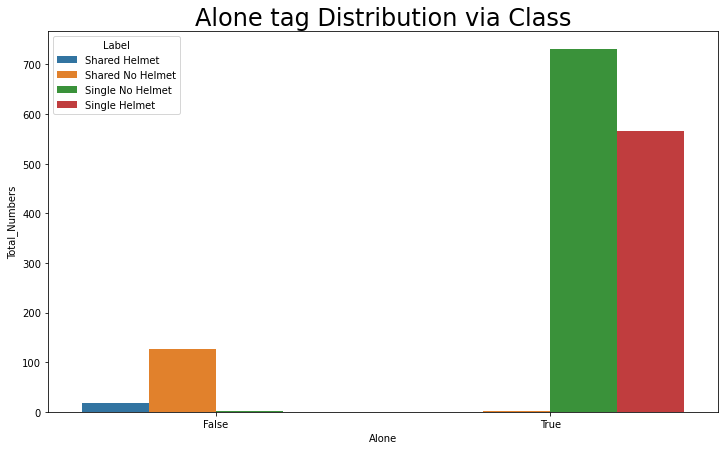

In [35]:
df_al = df_tags.groupby(["Alone", "Label"]).size().to_frame()
df_al.reset_index(inplace=True)
df_al = df_al.rename(columns={0:'Total_Numbers'})

fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.barplot(x='Alone', y='Total_Numbers', data=df_al, hue='Label')
ax.set_title('Alone tag Distribution via Class', fontsize=24)
plt.show()

In [37]:
df_hel

,Helmet,Label,Total_Numbers
0,False,Shared No Helmet,128
1,False,Single Helmet,2
2,False,Single No Helmet,715
3,True,Shared Helmet,17
4,True,Single Helmet,563
5,True,Single No Helmet,16


In [38]:
df_al

,Alone,Label,Total_Numbers
0,False,Shared Helmet,17
1,False,Shared No Helmet,127
2,False,Single No Helmet,1
3,True,Shared No Helmet,1
4,True,Single Helmet,565
5,True,Single No Helmet,730
